# E-Commerce Logistics Cost Analysis and 10% Savings Simulation

This notebook explores shipping cost patterns in a large e-commerce dataset and simulates how operational improvements could reduce total logistics costs by around 10%.


## 1. Introduction
 
This project analyzes a Brazilian e-commerce dataset to understand how shipping costs behave 
and identifies areas where costs can be reduced. 

The goal is to:
- explore the data
- detect cost inefficiencies
- model a realistic savings scenario
- estimate how changes to high-cost orders can impact total logistics cost



## 2. Data Loading
  
The table is loaded and inspected to understand its structure and completenes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use("default")

# main files
orders = pd.read_csv("../data/olist_orders_dataset.csv")
order_item = pd.read_csv("../data/olist_order_items_dataset.csv")
payments = pd.read_csv("../data/olist_order_payments_dataset.csv")
customers = pd.read_csv("../data/olist_customers_dataset.csv")

print("Order shape:",orders.shape)
print("Order items shape:",order_item.shape)
print("payments shape:",payments.shape)
print("Customer shape:",customers.shape)


# data infos
display(orders.head())
display(order_item.head())
display(payments.head())
display(customers.head())

orders.info()
order_item.info()
payments.info()
customers.info()

display(orders.describe())
display(order_item.describe())
display(payments.describe())
display(customers.describe())
# order.sample(10,random_state=42)

Order shape: (99441, 8)
Order items shape: (112650, 7)
payments shape: (103886, 5)
Customer shape: (99441, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


## 3. Data Cleaning

Only completed (delivered) orders are kept for analysis. 
Date columns are converted to proper datetime format, and we Add delivery metrics such as:

- delivery duration  
- delivery delay  


In [2]:
# date and time columns
timestamp_col = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
    "order_delivered_customer_date"
]
# converting to datetime frmt
for col in timestamp_col:
    orders[col] = pd.to_datetime(orders[col],errors='coerce')

orders[timestamp_col].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object

In [3]:
# keeping only delivered orders
orders_clean = orders[orders["order_status"]== "delivered"].copy()

# drop rows with missing important dates
orders_clean = orders_clean.dropna(subset=["order_purchase_timestamp","order_delivered_customer_date"])

In [4]:
# Time taken for delivery (in days)
orders_clean["delivery_days"]= (
    orders_clean["order_delivered_customer_date"] - 
    orders_clean["order_purchase_timestamp"]
).dt.days

# delays in delivery
orders_clean["delivery_delay"] = (
    orders_clean["order_delivered_customer_date"] - 
    orders_clean["order_estimated_delivery_date"]
).dt.days

In [5]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
# checking for nulls
print("ORDERS (original):")
print(orders.isna().sum())
print("\nORDERS_CLEAN (filtered delivered):")
print(orders_clean.isna().sum())

print(order_item.isna().sum())
print(payments.isna().sum())
print(customers.isna().sum())


ORDERS (original):
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

ORDERS_CLEAN (filtered delivered):
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
delivery_days                     0
delivery_delay                    0
dtype: int64

ORDER ITEMS:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
PAYMENTS:
order_id                0
payment_sequentia

## 4. Merging Datasets

Order details, item-level values, payments, and customer location are merged into a single 
analysis dataset. Aggregated features include total product value, freight cost, number of items,
and total payment value per order.


In [13]:
# group order items by order id
order_items_agg = (
    order_item.groupby("order_id").agg(
        items_count = ("order_item_id","nunique"),
        total_price=("price","sum"),
        total_freight=("freight_value","sum")
    ).reset_index()
)

In [14]:
# group payments by order id
payments_agg=(
    payments.groupby("order_id").agg(
        payment_value =("payment_value","sum"),
        payment_type_main=("payment_type",lambda x:x.iloc[0])
    ).reset_index()
)

In [15]:
customers_sel = customers[["customer_id","customer_city", "customer_state"]].copy()

In [20]:
# merge orders with item total
# add payment info
# add customer city/state
df = orders_clean.merge(order_items_agg,on="order_id",how="inner")
df = df.merge(payments_agg,on="order_id",how="left")
df = df.merge(customers_sel,on="customer_id",how="left")

order_cost = df.copy()
order_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96470 entries, 0 to 96469
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
 8   delivery_days                  96470 non-null  int64         
 9   delivery_delay                 96470 non-null  int64         
 10  items_count                    96470 non-null  int64         
 11  total_price    

In [21]:
order_cost.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay,items_count,total_price,total_freight,payment_value,payment_type_main,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,-8,1,29.99,8.72,38.71,credit_card,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,-6,1,118.70,22.76,141.46,boleto,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,-18,1,159.90,19.22,179.12,credit_card,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,-13,1,45.00,27.20,72.20,credit_card,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,-10,1,19.90,8.72,28.62,credit_card,santo andre,SP


## 5. Feature Engineering

To understand operational behavior, new metrics are created:

- total revenue  
- logistics cost  
- freight per item  
- payment processing fee estimate  
- gross margin proxy  
- estimated profit  
- logistics cost as a percentage of product value  
- delivery speed category  


In [22]:
# Create total revenue per order
order_cost["total_revenue"] = order_cost["total_price"] + order_cost["total_freight"]

In [23]:
# Logistics Cost
order_cost["logistics_cost"]=order_cost["total_freight"]

In [24]:
# Estimate payment fee 
order_cost["payment_fee"]=0.02*order_cost["payment_value"]

In [25]:
# rough margin estimate (around 30)
order_cost["gross_margin"] = 0.30 *order_cost["total_price"] 


In [26]:
# Estimate Order Profit
order_cost["total_operational_cost"]=(
    order_cost["logistics_cost"] + order_cost["payment_fee"]
)
# Profit
order_cost["order_profit"]=order_cost["gross_margin"] - order_cost["total_operational_cost"]

In [27]:
# Logistics cost % of revenue
order_cost["logistic_cost_pct"]=(
    order_cost["logistics_cost"]/order_cost["total_price"]
)

In [28]:
# Cost per item
order_cost["freight_per_item"]=(
    order_cost["total_freight"]/order_cost["items_count"]
)

In [32]:
# Delivery speed(fast / normal / slow)
def speed_category(days):
    if days <= 3:
        return "Fast"
    elif days <= 10:
        return "Normal"
    else:
        return "Slow"

order_cost["delivery_speed"]=order_cost["delivery_days"].apply(speed_category)

In [34]:
# High Cost Orders(anomaly detection)
order_cost["high_logistic_cost"] = order_cost["logistic_cost_pct"] > 0.40

In [36]:
order_cost.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay,...,total_revenue,logistics_cost,payment_fee,gross_margin,total_operational_cost,order_profit,logistic_cost_pct,freight_per_item,delivery_speed,high_logistic_cost
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,-8,...,38.71,8.72,0.7742,8.997,9.4942,-0.4972,0.290764,8.72,Normal,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,-6,...,141.46,22.76,2.8292,35.610,25.5892,10.0208,0.191744,22.76,Slow,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,-18,...,179.12,19.22,3.5824,47.970,22.8024,25.1676,0.120200,19.22,Normal,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,-13,...,72.20,27.20,1.4440,13.500,28.6440,-15.1440,0.604444,27.20,Slow,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,-10,...,28.62,8.72,0.5724,5.970,9.2924,-3.3224,0.438191,8.72,Fast,True


In [39]:
order_cost[[
    "total_price",
    "total_freight",
    "logistics_cost",
    "payment_fee",
    "order_profit",
    "logistic_cost_pct",
    "freight_per_item",
    "delivery_days",
    "delivery_delay"
]].describe()

,total_price,total_freight,logistics_cost,payment_fee,order_profit,logistic_cost_pct,freight_per_item,delivery_days,delivery_delay
count,96470.000000,96470.000000,96470.000000,96469.000000,96469.000000,96470.000000,96470.000000,96470.000000,96470.000000
mean,137.040001,22.785798,22.785798,3.197106,15.128955,0.308386,20.148509,12.093604,-11.875889
std,209.052608,21.559959,21.559959,4.376419,53.398243,0.311618,15.686988,9.551380,10.182105
min,0.850000,0.000000,0.000000,0.191800,-1536.859200,0.000000,0.000000,0.000000,-147.000000
25%,45.900000,13.850000,13.850000,1.237600,-4.902600,0.132017,13.370000,6.000000,-17.000000
50%,86.500000,17.170000,17.170000,2.105600,3.863800,0.224374,16.350000,10.000000,-12.000000
75%,149.900000,24.020000,24.020000,3.526600,19.393800,0.380567,21.160000,15.000000,-7.000000
max,13440.000000,1794.960000,1794.960000,273.281600,3534.638400,21.447059,409.680000,209.000000,188.000000


## 6. Exploratory Data Analysis (EDA)

This section explores cost distributions, delivery performance, and regional patterns.  
Charts highlight:

- highly skewed freight values  
- orders where shipping cost exceeds product price  
- cost differences across states  
- profit variation  
- single-item orders with unusually high cost  


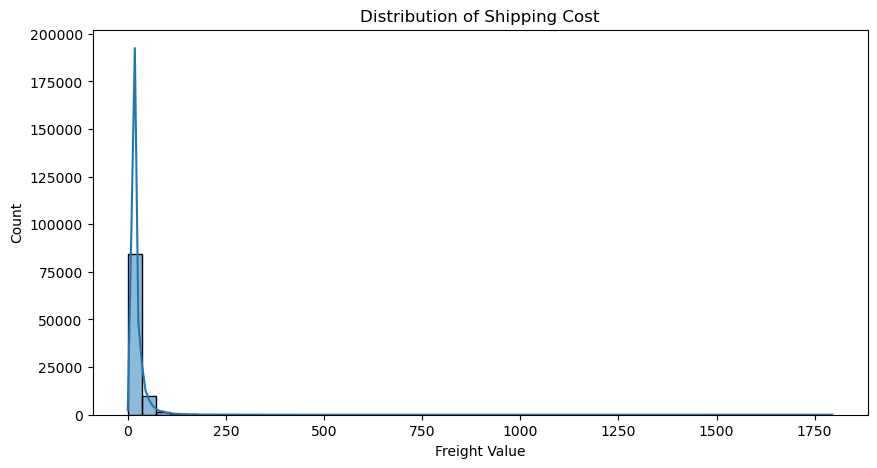

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(order_cost["total_freight"],bins=50,kde=True)
plt.title("Distribution of Shipping Cost")
plt.xlabel("Freight Value")
plt.ylabel("Count")
plt.show()

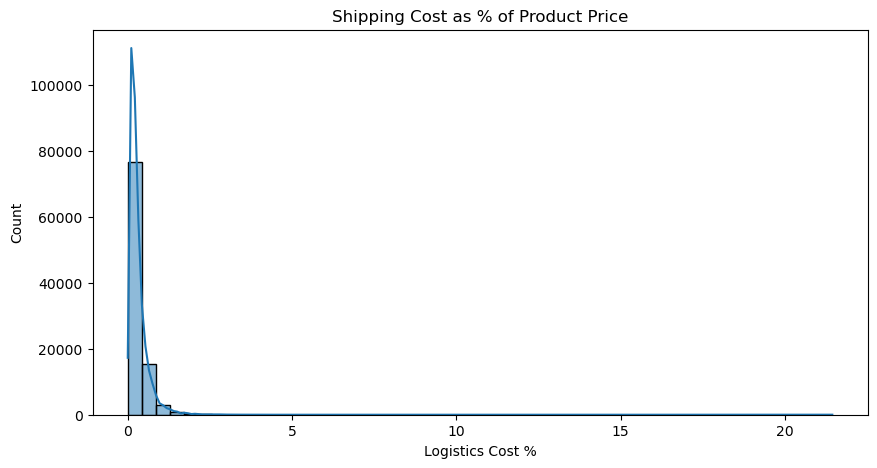

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(order_cost["logistic_cost_pct"], bins=50, kde=True)
plt.title("Shipping Cost as % of Product Price")
plt.xlabel("Logistics Cost %")
plt.show()


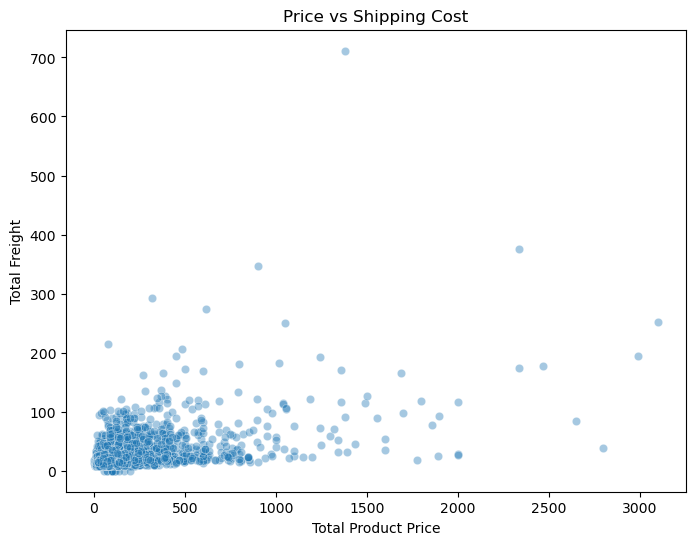

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=order_cost.sample(5000, random_state=42), 
    x="total_price", 
    y="total_freight",
    alpha=0.4
)
plt.title("Price vs Shipping Cost")
plt.xlabel("Total Product Price")
plt.ylabel("Total Freight")
plt.show()


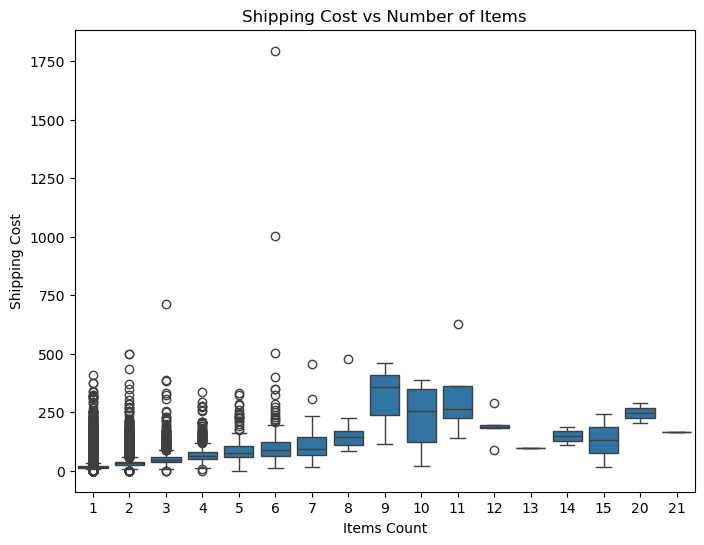

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=order_cost,
    x="items_count",
    y="total_freight"
)
plt.title("Shipping Cost vs Number of Items")
plt.xlabel("Items Count")
plt.ylabel("Shipping Cost")
plt.show()


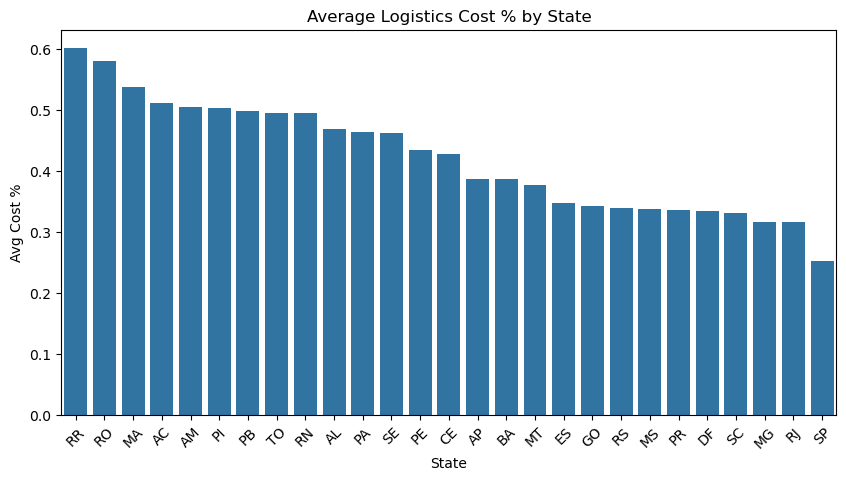

In [50]:
state_cost = (
    order_cost.groupby("customer_state")["logistic_cost_pct"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(x=state_cost.index, y=state_cost.values)
plt.title("Average Logistics Cost % by State")
plt.xlabel("State")
plt.ylabel("Avg Cost %")
plt.xticks(rotation=45)
plt.show()


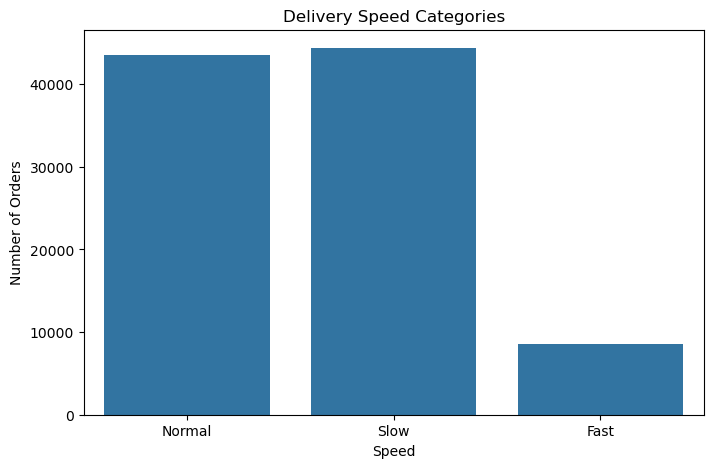

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x="delivery_speed", data=order_cost)
plt.title("Delivery Speed Categories")
plt.xlabel("Speed")
plt.ylabel("Number of Orders")
plt.show()


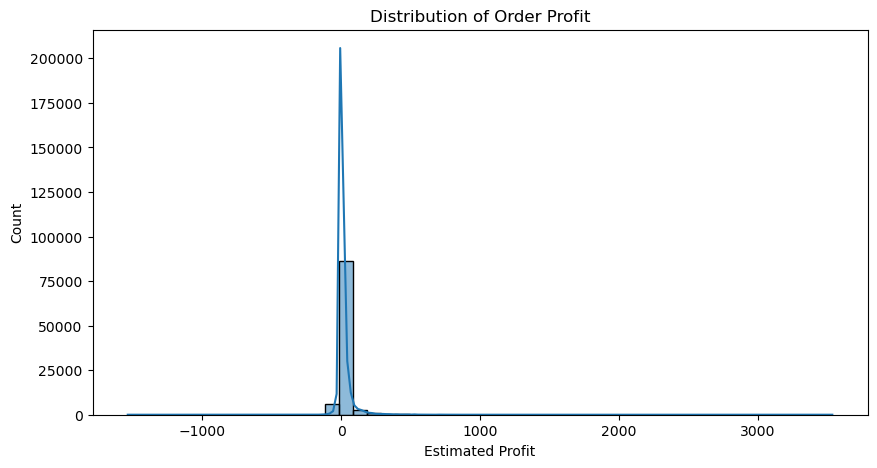

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(order_cost["order_profit"], bins=50, kde=True)
plt.title("Distribution of Order Profit")
plt.xlabel("Estimated Profit")
plt.ylabel("Count")
plt.show()


In [55]:
order_cost["high_logistic_cost"].value_counts(normalize=True) * 100


high_logistic_cost
False    77.024982
True     22.975018
Name: proportion, dtype: float64

In [56]:
orders_sorted = order_cost.sort_values(
    "logistic_cost_pct",ascending = False
).reset_index(drop=True)

orders_sorted.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay,...,total_revenue,logistics_cost,payment_fee,gross_margin,total_operational_cost,order_profit,logistic_cost_pct,freight_per_item,delivery_speed,high_logistic_cost
0,3ee6513ae7ea23bdfab5b9ab60bffcb5,161b6d415e8b3413c6609c70cf405b5a,delivered,2018-04-24 11:01:06,2018-04-26 03:55:26,2018-04-26 13:28:00,2018-05-07 23:21:11,2018-05-17,13,-10,...,19.08,18.23,0.3816,0.255,18.6116,-18.3566,21.447059,18.23,Slow,True
1,6e864b3f0ec71031117ad4cf46b7f2a1,9f9d249355f63c5c1216a82b802452c1,delivered,2018-04-24 20:15:21,2018-04-24 20:33:18,2018-04-25 13:36:00,2018-05-04 19:32:53,2018-05-18,9,-14,...,19.08,18.23,0.3816,0.255,18.6116,-18.3566,21.447059,18.23,Normal,True
2,7c92284adbec8033d160303d83065dbf,f4f811f335e7ad2807493faebcb874ef,delivered,2018-07-17 16:55:18,2018-07-17 17:05:26,2018-07-18 09:04:00,2018-07-26 18:26:44,2018-08-08,9,-13,...,63.87,54.69,1.2774,2.754,55.9674,-53.2134,5.957516,18.23,Normal,True
3,b2d30dfaf7114de8ab3f737d062032fe,b498a2691a3bd3fcc7107cbdf3d5633a,delivered,2017-05-09 10:19:17,2017-05-10 02:50:18,2017-05-12 10:16:01,2017-05-24 15:04:42,2017-06-26,15,-33,...,40.10,34.15,0.8020,1.785,34.9520,-33.1670,5.739496,34.15,Slow,True
4,21fb84496c034392ca2aafe7f7919a3f,c1d8411b66c3b249ad98ad437f1ae958,delivered,2017-09-15 04:48:38,2017-09-15 05:04:41,2017-09-16 11:06:35,2017-10-01 12:44:49,2017-10-05,16,-4,...,44.89,37.90,0.8978,2.097,38.7978,-36.7008,5.422031,37.90,Slow,True


In [58]:
base_logistics_cost = order_cost["logistics_cost"].sum()
base_logistics_cost

2198145.9

## 7. Savings Simulation Model

A simulation tests how reducing shipping cost for the worst high-cost orders 
(top 20–30%) impacts total logistics expenses.

The final model shows that a reduction of around 20–25% for the highest-cost segment 
can bring approximately 10% overall savings.


In [59]:
# func to simulate savings based on top % orders and reduction %
def simulate_scn(df,top_pct,reduction_pct):
    total_orders = len(df)
    cutoff = int(top_pct * total_orders)
    
    # worst orders by shipping %
    worst_orders = df.sort_values(
        'logistic_cost_pct',ascending=False
    ).head(cutoff).index

    new_cost = df["logistics_cost"].copy()
    
    # reduction
    
    new_cost.loc[worst_orders] *=(1 - reduction_pct)
    
    # total
    new_total = new_cost.sum()

    # savings
    savings_abs = base_logistics_cost - new_total
    savings_pct = savings_abs / base_logistics_cost

    return round(savings_abs,2),round(savings_pct * 100,2)

In [62]:
options_top = [0.10, 0.20, 0.30, 0.40]      
options_reduction = [0.10, 0.20, 0.25, 0.30] 

results = []

for top in options_top:
    for red in options_reduction:
        s_abs, s_pct = simulate_scn(order_cost, top, red)
        results.append((top, red, s_abs, s_pct))

results_df = pd.DataFrame(
    results, 
    columns=["Top % Orders", "Reduction %", "Savings (₹)", "Savings (%)"]
)

results_df


,Top % Orders,Reduction %,Savings (₹),Savings (%)
0,0.1,0.10,25480.88,1.16
1,0.1,0.20,50961.75,2.32
2,0.1,0.25,63702.19,2.90
3,0.1,0.30,76442.62,3.48
4,0.2,0.10,50376.93,2.29
5,0.2,0.20,100753.85,4.58
6,0.2,0.25,125942.31,5.73
7,0.2,0.30,151130.78,6.88
8,0.3,0.10,74870.01,3.41
9,0.3,0.20,149740.02,6.81


In [63]:
results_df[results_df["Savings (%)"].between(9.5, 10.5)]


,Top % Orders,Reduction %,Savings (₹),Savings (%)
11,0.3,0.3,224610.04,10.22


In [66]:
best_top = 0.30
best_reduction = 0.25

cutoff = int(best_top * len(order_cost))
worst_idx = orders_sorted.head(cutoff).index

order_cost["optimized_logistics_cost"] = order_cost["logistics_cost"].copy()
order_cost.loc[worst_idx, "optimized_logistics_cost"] *= (1 - best_reduction)


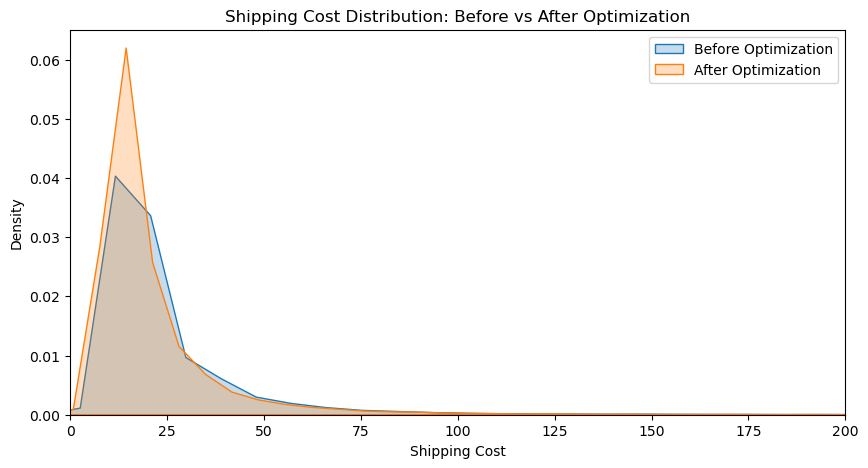

In [69]:
plt.figure(figsize=(10,5))
sns.kdeplot(order_cost["logistics_cost"], label="Before Optimization", fill=True)
sns.kdeplot(order_cost["optimized_logistics_cost"], label="After Optimization", fill=True)
plt.title("Shipping Cost Distribution: Before vs After Optimization")
plt.xlabel("Shipping Cost")
plt.xlim(0, 200)  
plt.legend()
plt.show()



## 8. Conclusion

The analysis shows that a small number of orders account for a large share of logistics costs.  
These orders typically have low product value, single units, or are shipped to remote states.  

Targeting this segment with optimized packaging, courier negotiation, 
or minimum order thresholds can realistically reduce total logistics cost by ~10%.
